In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#check for missing values
cars.isna().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


# Correlation Matrix

<Axes: >

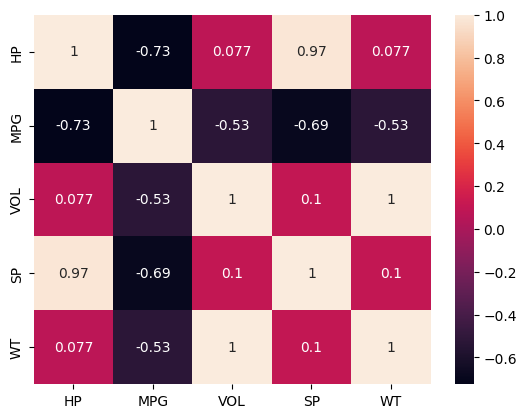

In [5]:
sns.heatmap(cars.corr(),annot=True)

# Scatterplot between variables along with histograms

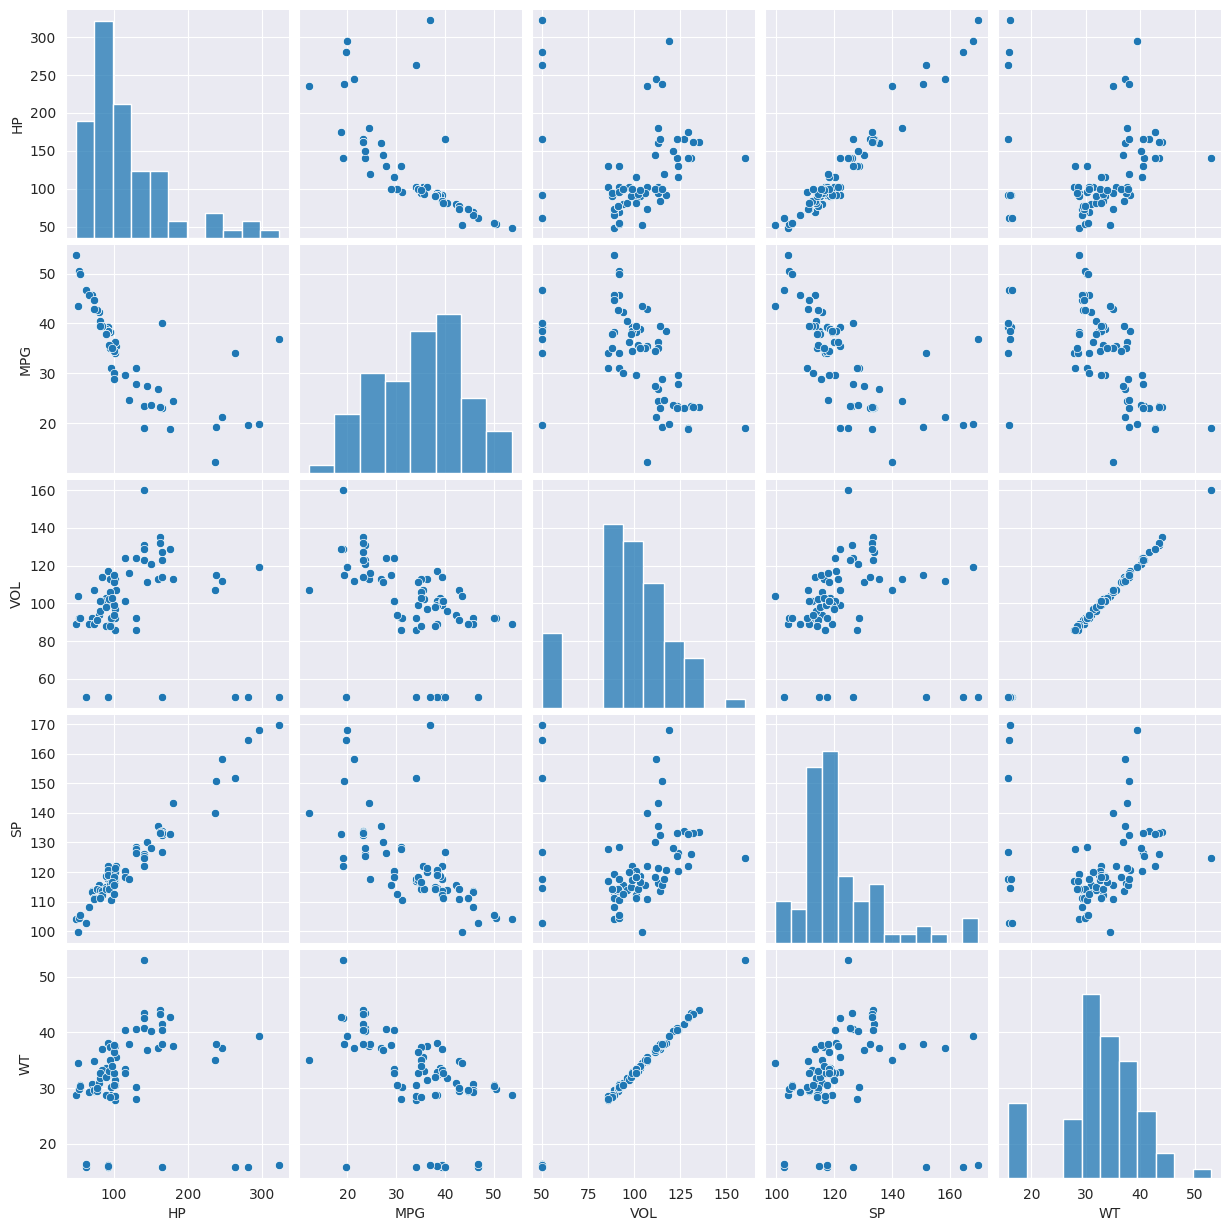

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.54e-23
Time:                        07:33:06   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Coefficients
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.7705372737359842), np.float64(0.7584602881431413))

# Simple Linear Regression Models

In [ ]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

In [ ]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

In [ ]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

# Calculating VIF

In [ ]:
#variance inflation factor
smf.ols("HP~SP+WT+VOL",data=cars).fit().rsquared

In [13]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [12]:
model1=smf.ols('MPG~HP+SP+VOL',data=cars).fit()
print(model1.rsquared,model1.rsquared_adj)
model1.summary(())

0.7703683413213018 0.7614216533208331


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ()   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.56e-24
Time:                        08:02:52   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2=smf.ols('MPG~HP+SP+WT',data=cars).fit()
print(model2.rsquared,model2.rsquared_adj)
model2.summary()

In [ ]:
rsq_hp = smf.ols('HP~VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_vol = smf.ols('VOL~SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['Hp','VOL','SP'],'VIF':[vif_hp,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

In [14]:
model.resid

,0
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


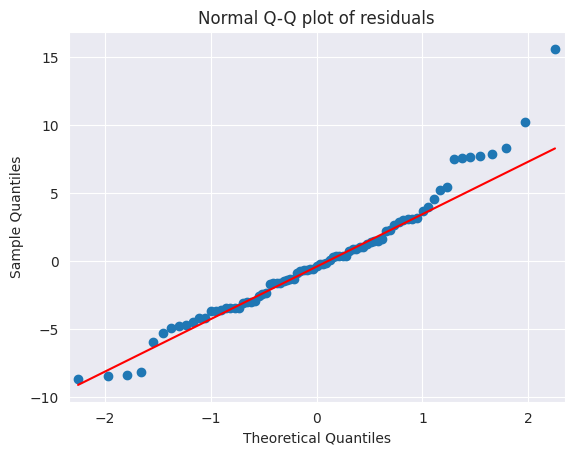

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))   #lists out all indices with residual more than 10

## Residual Plot for Homoscedasticity

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [17]:
cars['MPG'],model.fittedvalues,model.resid

(0     53.700681
 1     50.013401
 2     50.013401
 3     45.696322
 4     50.504232
         ...    
 76    36.900000
 77    19.197888
 78    34.000000
 79    19.833733
 80    12.101263
 Name: MPG, Length: 81, dtype: float64,
 0     43.441935
 1     42.388793
 2     42.279341
 3     42.538360
 4     42.172648
         ...    
 76    21.282096
 77    17.899050
 78    26.136453
 79    12.316612
 80    15.559481
 Length: 81, dtype: float64,
 0     10.258747
 1      7.624608
 2      7.734060
 3      3.157963
 4      8.331584
         ...    
 76    15.617904
 77     1.298838
 78     7.863547
 79     7.517122
 80    -3.458218
 Length: 81, dtype: float64)

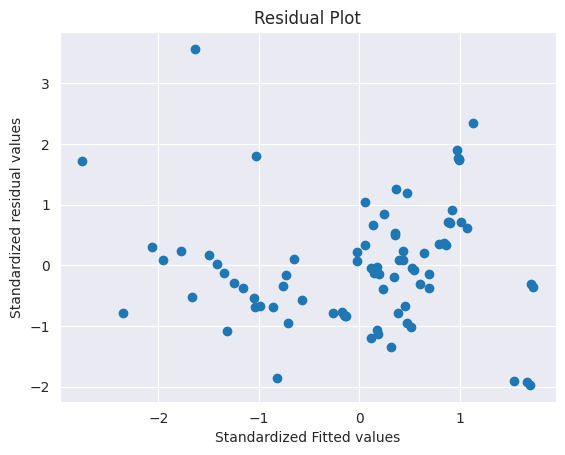

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

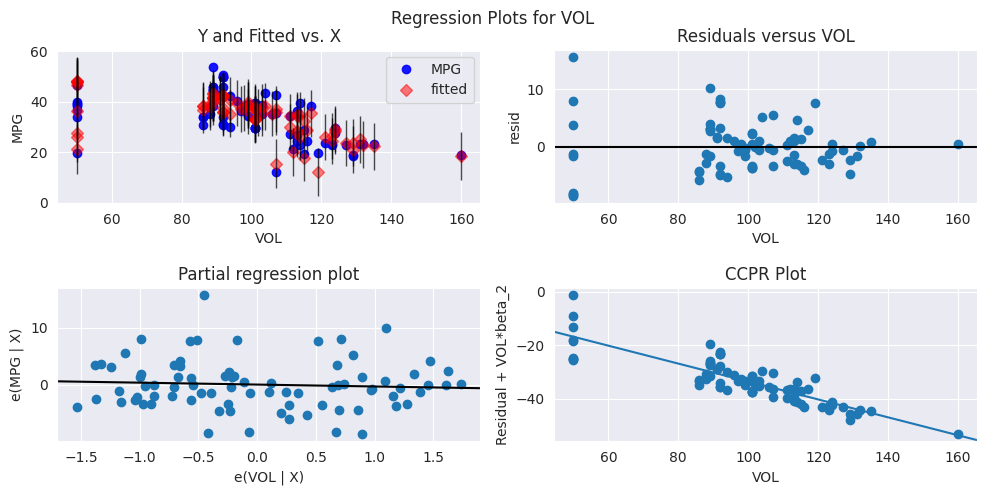

In [19]:
fig = plt.figure(figsize=(10,5))            #regression results against one regressor
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

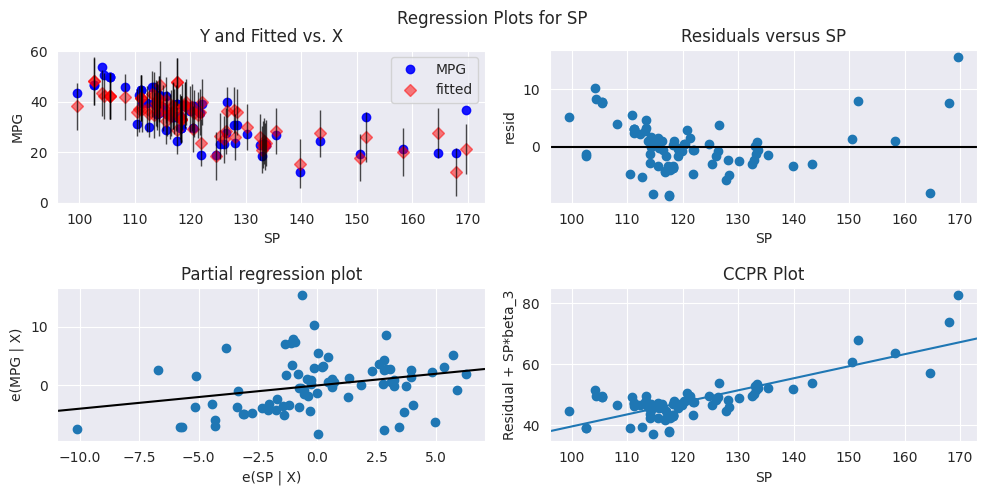

In [20]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

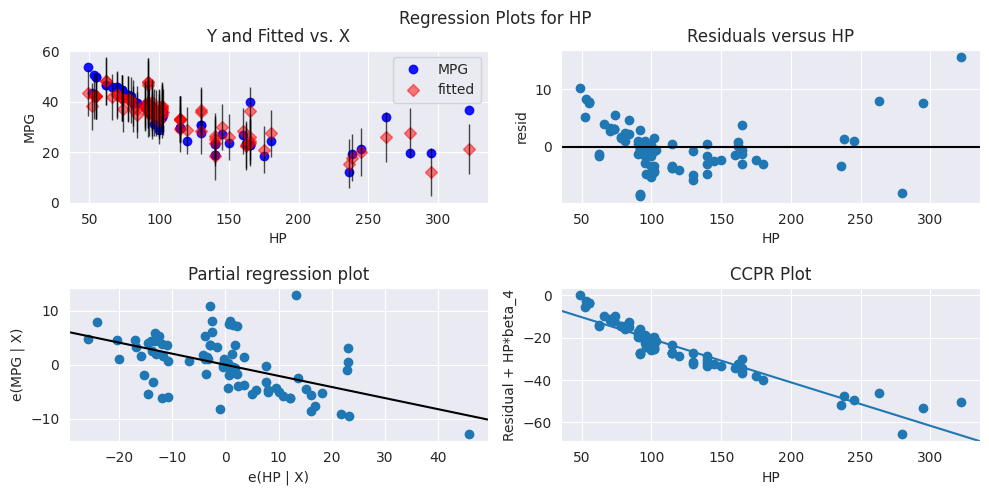

In [21]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

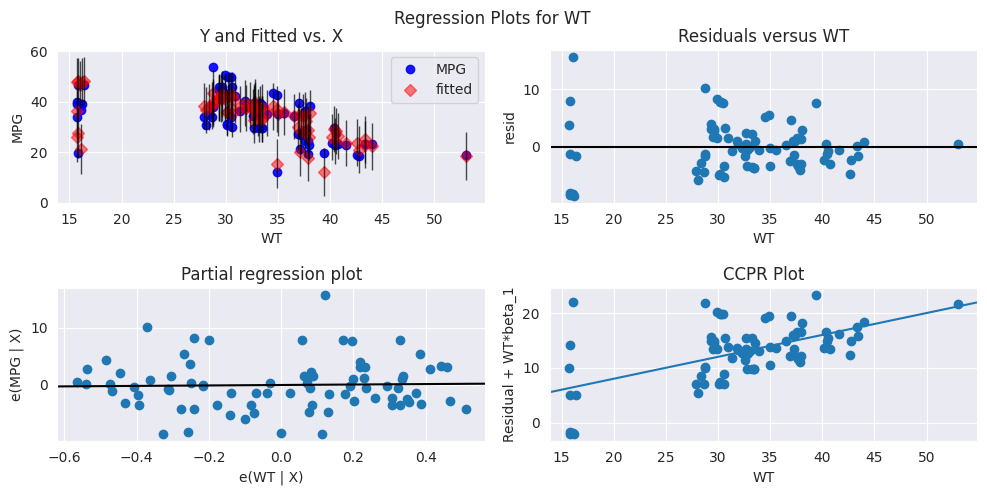

In [22]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

In [ ]:
model.rsquared

## Cook’s Distance

In [23]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [24]:
len(c)

81

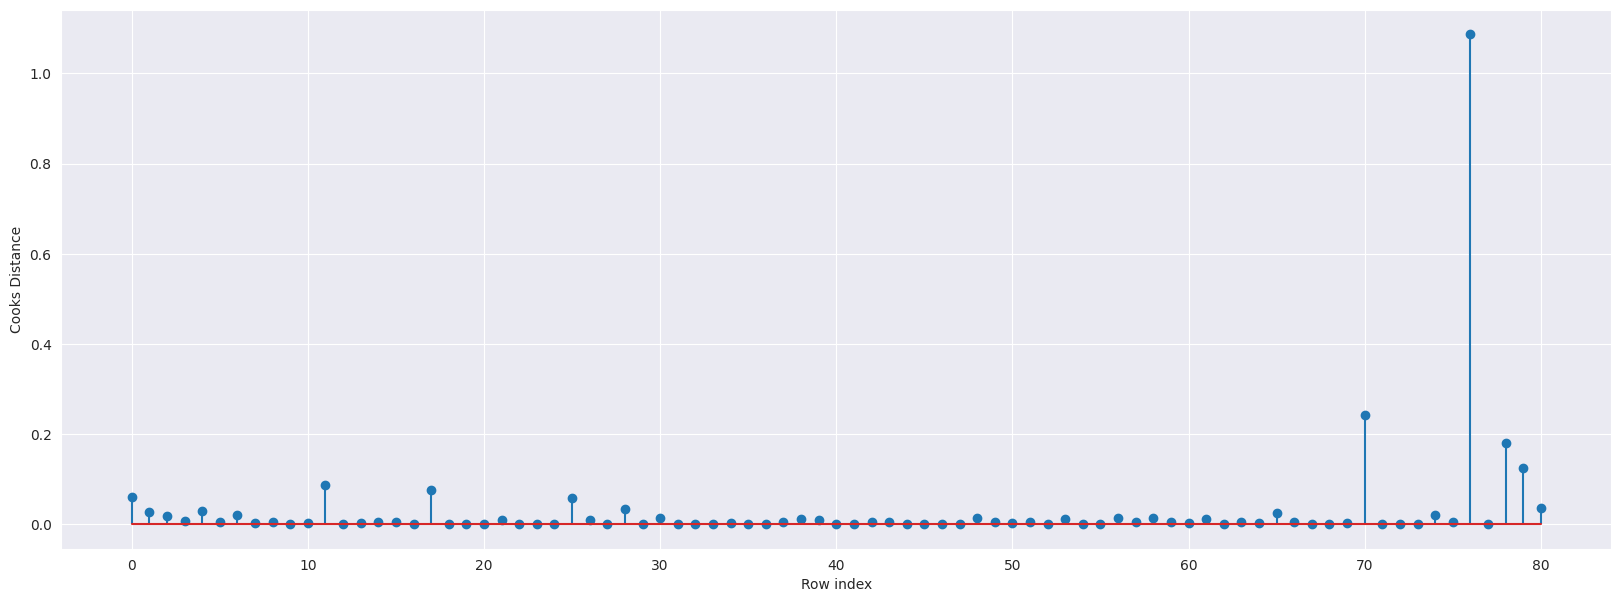

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(np.int64(76), np.float64(1.0865193998179699))

## High Influence points

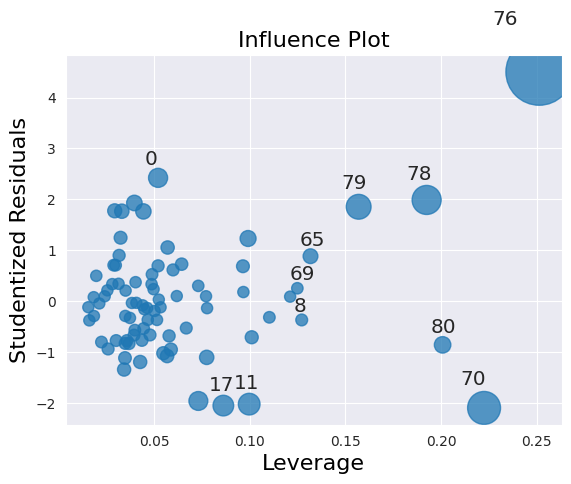

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.2222222222222222


#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [32]:
cars[cars.index.isin([70, 76])]
#implausible

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [33]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [30]:
#Load the data
cars_new = pd.read_csv("Cars.csv")

In [31]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index(drop=True)
#car1=cars_new.drop([70,76],axis=0).reset_index()
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [ ]:
#Drop the original index
#car1=car1.drop(['index'],axis=1)

In [34]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [35]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [36]:
(final_ml_V.rsquared,final_ml_V.aic)

(np.float64(0.8161692010376008), np.float64(446.1172263944772))

In [37]:

#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [38]:
(final_ml_W.rsquared,final_ml_W.aic)

(np.float64(0.8160034320495303), np.float64(446.1884323575032))

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [39]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

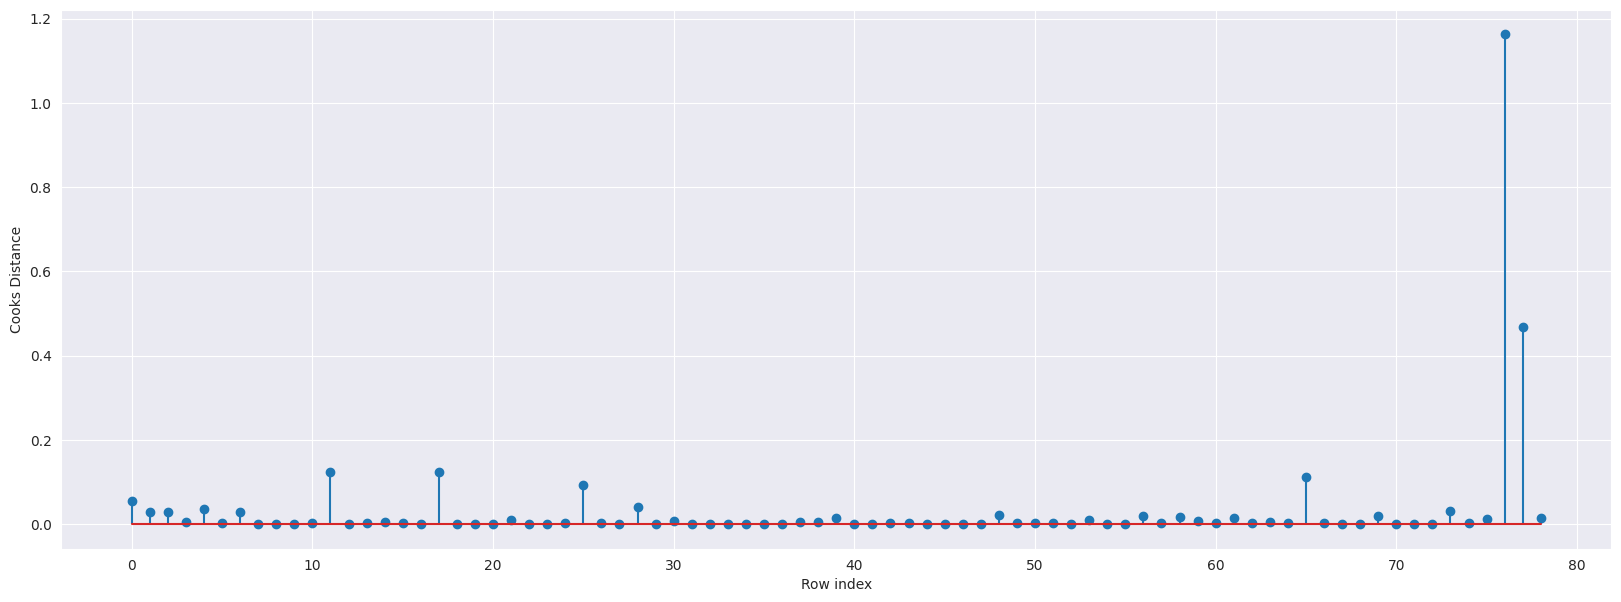

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [41]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(np.int64(76), np.float64(1.1629387469135182))

In [42]:
k = car1.shape[1]-1
n = car1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.189873417721519


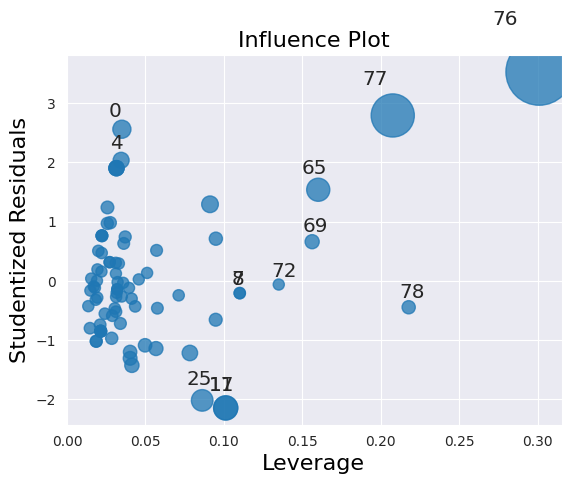

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

In [44]:

#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [45]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index(drop=True)

In [ ]:


#car4=car3.drop(['index'],axis=1)

In [ ]:
car3

In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car3).fit()

In [ ]:
final_ml_V.rsquared,final_ml_V.aic

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))








#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car3).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

## Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
new_data

In [ ]:
final_ml_V.predict(new_data)

In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,])

In [ ]:
cars_new.MPG.head()

In [ ]:
pred_y = final_ml_V.predict(cars_new)

In [ ]:
pred_y

In [ ]:
cars_new.MPG

# **Using Sklearn linear regression**

In [ ]:
import pandas as pd
df=pd.read_csv("Cars.csv")

In [ ]:
df.head()

In [ ]:
X=df.drop(columns=['MPG'])
Y=df.MPG

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
reg=LinearRegression()
reg.fit(X,Y)

In [ ]:
Y_pred=reg.predict(X)

In [ ]:
data=pd.DataFrame({'Actual':Y,
                   'Predicted':Y_pred})
data.head()

In [ ]:
reg.score(X,Y)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,Y_pred)

In [ ]:
import sklearn
help(sklearn.metrics)

In [ ]:
resid=Y-Y_pred

In [ ]:
sm.graphics.qqplot(resid,line='q');